<a href="https://colab.research.google.com/github/sanjayi2000/opencv/blob/main/2348552_CVLAB5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
input_image = cv2.imread('/content/tasm.jpg', 0)

In [5]:
dft = cv2.dft(np.float32(input_image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

Creating Ideal low pass filter

In [9]:
rows, cols = input_image.shape
crow, ccol = rows // 2, cols // 2
mask = np.zeros((rows, cols, 2), np.uint8)
r = 30
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 1

dft_shift_low_pass = dft_shift * mask


Inverse DFT to Obtain filtered image

In [7]:
f_ishift_low_pass = np.fft.ifftshift(dft_shift_low_pass)
filtered_image_low_pass = cv2.idft(f_ishift_low_pass)
filtered_image_low_pass = cv2.magnitude(filtered_image_low_pass[:, :, 0], filtered_image_low_pass[:, :, 1])

Creating and applying Ideal High pass filter

In [8]:
mask_high_pass = 1 - mask

In [10]:
dft_shift_high_pass = dft_shift * mask_high_pass

In [11]:
f_ishift_high_pass = np.fft.ifftshift(dft_shift_high_pass)
filtered_image_high_pass = cv2.idft(f_ishift_high_pass)
filtered_image_high_pass = cv2.magnitude(filtered_image_high_pass[:, :, 0], filtered_image_high_pass[:, :, 1])

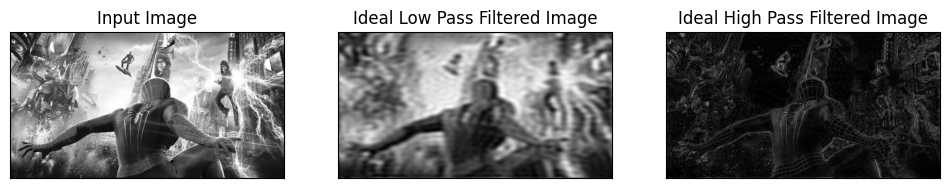

In [12]:
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(input_image, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(filtered_image_low_pass, cmap='gray')
plt.title('Ideal Low Pass Filtered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(filtered_image_high_pass, cmap='gray')
plt.title('Ideal High Pass Filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()